### **To run all of the cells without needing to change the image paths, make sure all the test images are loaded to your Google Drive in a folder named "images". Please run in order to prevent "not defined" issues since some questions use implementations from previous questions.**

In [2]:
!pip install opencv-python
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
import math, cmath
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


# **Morphological Operations**


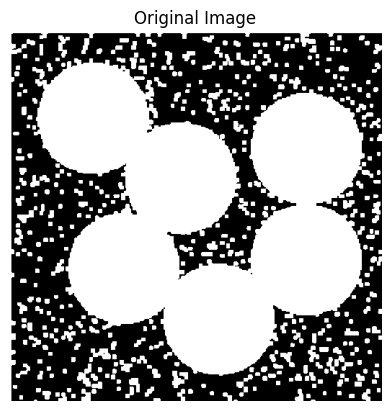

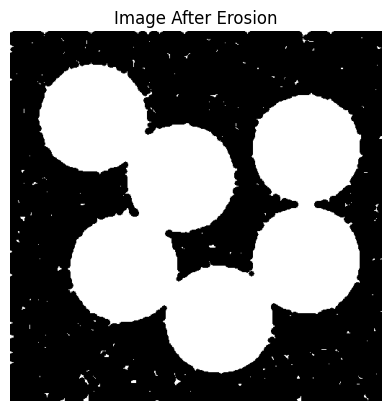

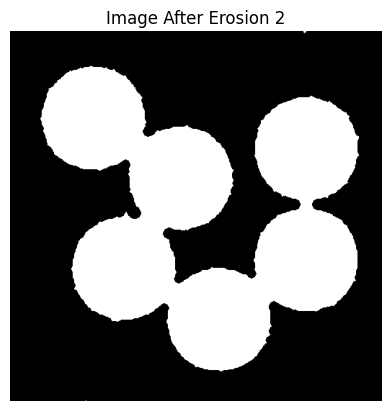

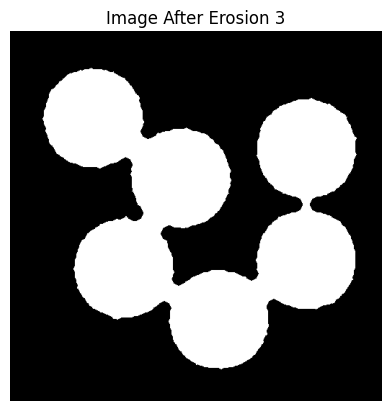

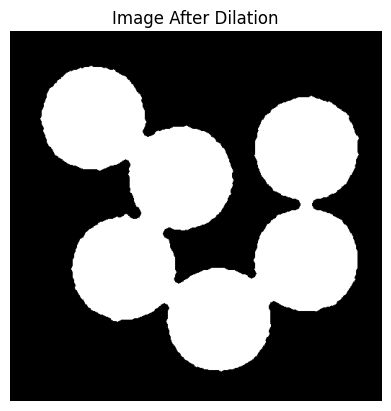

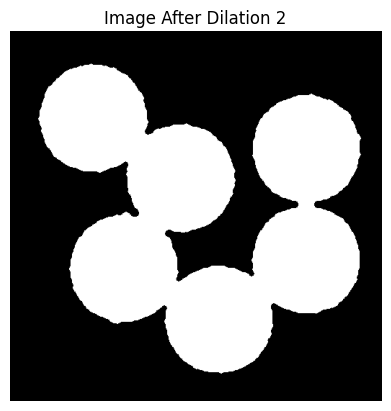

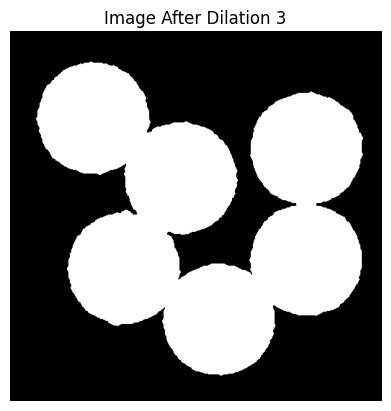

In [20]:
src_img = cv2.imread('/content/gdrive/MyDrive/images/morphological_operations.png', cv2.IMREAD_GRAYSCALE)
# Convert to binary image
_, src_img = cv2.threshold(src_img, 127, 1, cv2.THRESH_BINARY) # the given source image is not a binary image and for the
                                                                # dilation and erosion operations the source image is needed to be binary.
                                                                # Therefore, I am thresholding the image to transform it to a binary image.
struc_element = [[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]]

def dilation(src_img, struc_element):

    output_img = [[0 for _ in range(len(src_img[0]))] for _ in range(len(src_img))]
    vertical_padding = len(struc_element)//2
    horizontal_padding = len(struc_element[0])//2

    for n in range (len(src_img)):
        for m in range (len(src_img[0])):
            if(src_img[n][m] == 1):
                for i in range (len(struc_element)):
                    for j in range (len(struc_element[0])):
                        if (0<=n+i-vertical_padding<len(src_img) and 0<=m+j-horizontal_padding<len(src_img[0])):
                            output_img[n+i-vertical_padding][m+j-horizontal_padding] = output_img[n+i-vertical_padding][m+j-horizontal_padding] | struc_element[i][j]

    return output_img

def erosion(src_img, struc_element):

    output_img = [[0 for _ in range(len(src_img[0]))] for _ in range(len(src_img))]
    vertical_padding = len(struc_element) // 2
    horizontal_padding = len(struc_element[0]) // 2

    for n in range(len(src_img)):
        for m in range(len(src_img[0])):
            match = True
            for i in range(len(struc_element)):
                for j in range(len(struc_element[0])):
                    x = n + i - vertical_padding
                    y = m + j - horizontal_padding
                    if 0 <= x < len(src_img) and 0 <= y < len(src_img[0]):
                        if struc_element[i][j] == 1 and src_img[x][y] != 1:
                            match = False
                            break
                if not match:
                    break

            if match:
                output_img[n][m] = 1

    return output_img

plt.axis('off')
plt.imshow(src_img, cmap='gray')
plt.title('Original Image')
plt.show()
image = erosion(src_img, struc_element)
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.title("Image After Erosion")
plt.show()
image = erosion(image, struc_element)
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.title("Image After Erosion 2")
plt.show()
image = erosion(image, struc_element)
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.title("Image After Erosion 3")
plt.show()
image = dilation(image, struc_element)
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.title("Image After Dilation")
plt.show()
image = dilation(image, struc_element)
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.title("Image After Dilation 2")
plt.show()
image = dilation(image, struc_element)
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.title("Image After Dilation 3")
plt.show()

# **Histogram Based Image Enhancement**

## Part 1

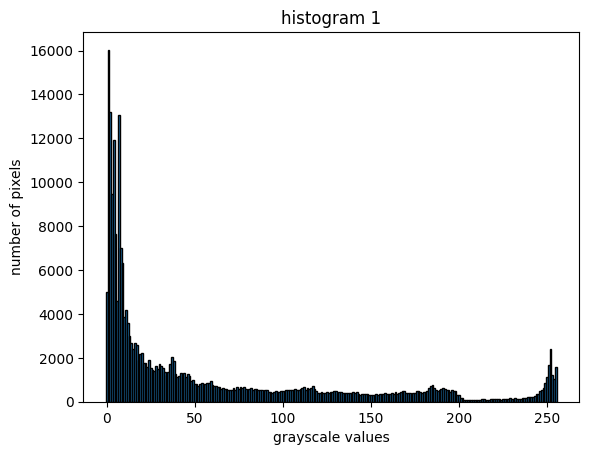

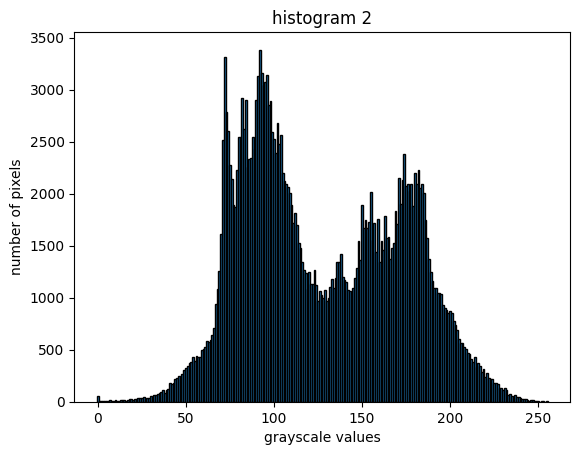

In [21]:
def histogram(source_image):

    histogram = [0] * 256
    for row in source_image:
        for pixel in row:
            histogram[pixel] += 1
    return histogram

src_img_1 = cv2.imread('/content/gdrive/MyDrive/images/hist1.jpg', cv2.IMREAD_GRAYSCALE)
src_img_2 = cv2.imread('/content/gdrive/MyDrive/images/hist2.jpg', cv2.IMREAD_GRAYSCALE)
histogram_1 = histogram(src_img_1)
histogram_2 = histogram(src_img_2)
plt.bar(range(256), histogram_1, width=1, edgecolor='black')
plt.xlabel('grayscale values')
plt.ylabel('number of pixels')
plt.title('histogram 1')
plt.show()
plt.bar(range(256), histogram_2, width=1, edgecolor='black')
plt.xlabel('grayscale values')
plt.ylabel('number of pixels')
plt.title('histogram 2')
plt.show()

## Part 2
Here, the parameters c and d can be changed inside of the function.

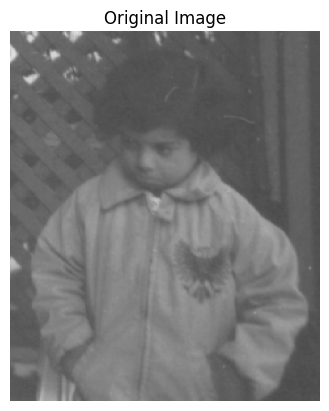

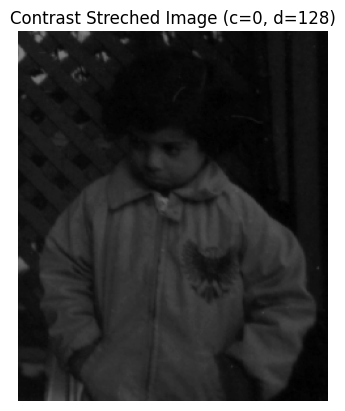

In [22]:
def contrast_streching(source_image):

    a = source_image.max()
    b = source_image.min()
    c = 0
    d = 128

    for i in range (len(source_image)):
        for j in range (len(source_image[0])):
            source_image[i][j] = ((source_image[i][j] - b) / (a - b)) * (d - c) + c

    return source_image

src_img = cv2.imread('/content/gdrive/MyDrive/images/contrastive_strecth.png')
plt.axis('off')
plt.imshow(src_img, cmap='gray')
plt.title('Original Image')
plt.show()
contrast_streched_image = contrast_streching(src_img)
plt.axis('off')
plt.imshow(contrast_streched_image, cmap='gray')
plt.title('Contrast Streched Image (c=0, d=128)')
plt.show()

# **Otsu Thresholding**

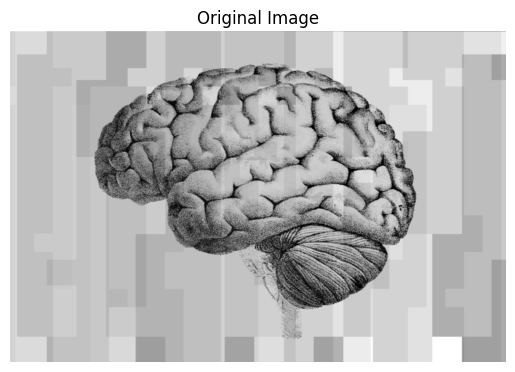

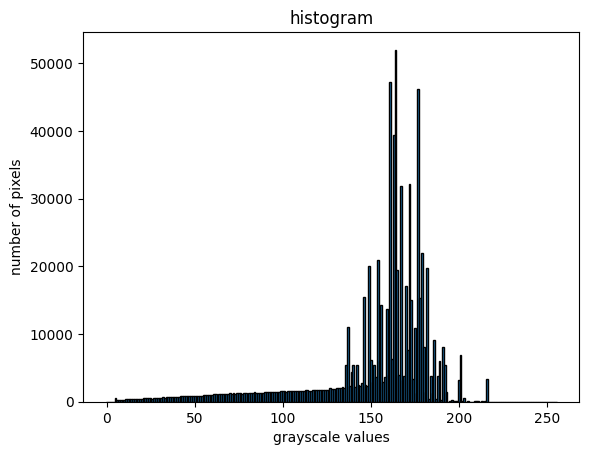

Threshold: 216


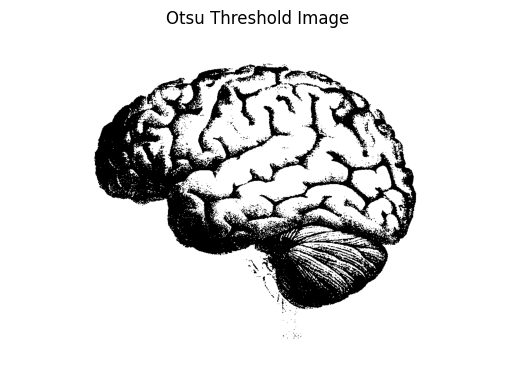

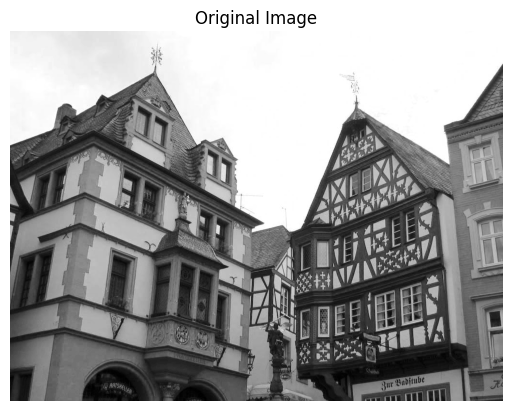

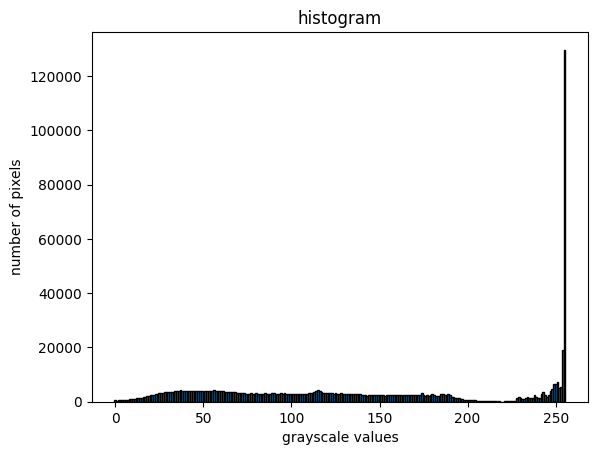

Threshold: 255


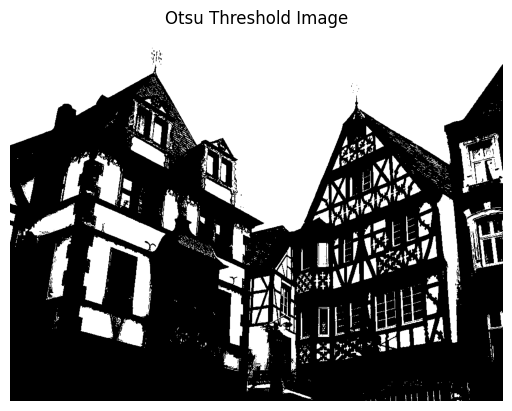

In [23]:
def otsu_threshold(source_image):

    hist = histogram(source_image)
    plt.bar(range(256), hist, width=1, edgecolor='black')
    plt.xlabel('grayscale values')
    plt.ylabel('number of pixels')
    plt.title('histogram')
    plt.show()
    image_size = len(source_image) * len(source_image[0])
    total_pixel_sum = sum(i * hist[i] for i in range(len(hist)))

    otsu_threshold = 0
    max_otsu_value = 0

    for i in range(len(hist)):
        w_b = sum(hist[:i+1])

        if(w_b == 0): # prevent division by 0
            continue

        w_f = image_size - w_b

        if(w_f == 0):
            break

        m_b = sum(i * hist[i] for i in range(i+1)) / w_b
        m_f = (total_pixel_sum - sum(i * hist[i] for i in range(i+1))) / w_f

        otsu_value = w_b * w_f * (m_b - m_f) ** 2 # variance_between_classes

        if(otsu_value > max_otsu_value):
            max_otsu_value = otsu_value
            otsu_threshold = i
    print(f"Threshold: {i}")
    binary_image = []
    for row in source_image:
        binary_row = []
        for pixel in row:
            if pixel <= otsu_threshold:
                binary_row.append(0)
            else:
                binary_row.append(1)
        binary_image.append(binary_row)

    return binary_image

src_img = cv2.imread('/content/gdrive/MyDrive/images/otsu_1.png', cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(src_img, cmap='gray')
plt.title('Original Image')
plt.show()
threshold_image = otsu_threshold(src_img)
plt.axis('off')
plt.imshow(threshold_image, cmap='gray')
plt.title('Otsu Threshold Image')
plt.show()
src_img = cv2.imread('/content/gdrive/MyDrive/images/otsu_2.jpg', cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(src_img, cmap='gray')
plt.title('Original Image')
plt.show()
threshold_image = otsu_threshold(src_img)
plt.axis('off')
plt.imshow(threshold_image, cmap='gray')
plt.title('Otsu Threshold Image')
plt.show()

# **2-D Convolution in Spatial and Frequency Domain**

## Part 1

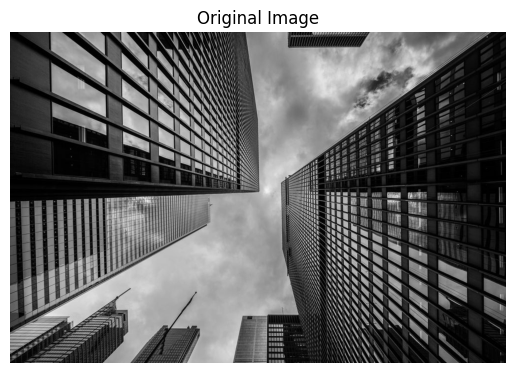

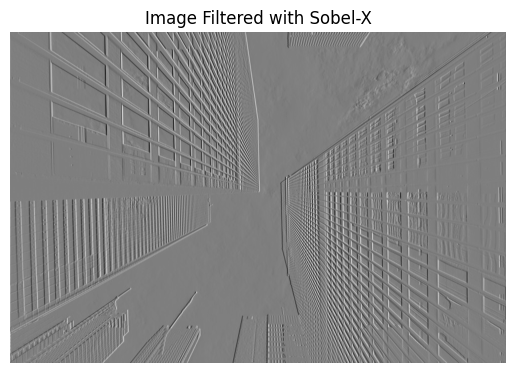

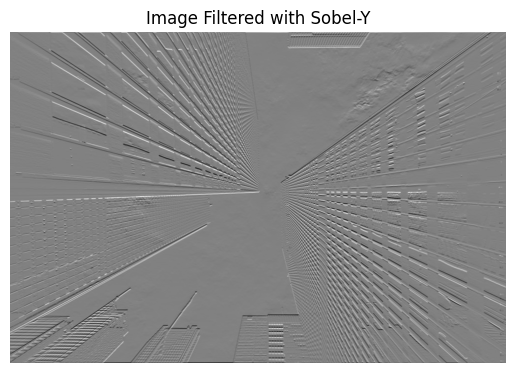

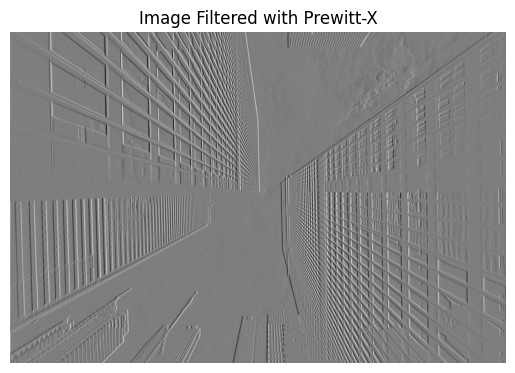

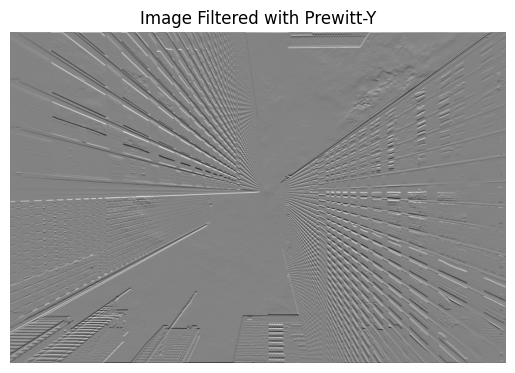

In [24]:
def spatial_2d_convolution(source_image, filter):

    horizontal_center = len(filter[0]) // 2
    vertical_center = len(filter) // 2

    padded_img = [[0] * ( len(source_image[0]) + 2 * horizontal_center) for _ in range(len(source_image) + 2 * vertical_center)]

    for i in range(len(source_image)):
        for j in range(len(source_image[0])):
            padded_img[i + vertical_center][j + horizontal_center] = source_image[i][j]

    output_image = [[0] * ( len(source_image[0]) ) for _ in range(len(source_image))]

    for i in range(len(source_image)):
        for j in range(len(source_image[0])):
            sum = 0
            for k in range(len(filter)):
                for l in range(len(filter[0])):
                    sum += padded_img[i+k][j+l] * filter[k][l]
            output_image[i][j] = sum

    return output_image

prewitt_x = [[-1, 0, 1],
            [-1, 0, 1],
            [-1, 0, 1]]

prewitt_y = [[-1, -1, -1],
            [0, 0, 0],
            [1, 1, 1]]

sobel_x = [[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]]

sobel_y = [[-1, -2, -1],
          [0, 0, 0],
          [1, 2, 1]]

src_img = cv2.imread('/content/gdrive/MyDrive/images/convolution_spatial_domain.jpg', cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(src_img, cmap='gray')
plt.title('Original Image')
plt.show()
sobel_x_filtered_image = spatial_2d_convolution(src_img, sobel_x)
plt.axis('off')
plt.imshow(sobel_x_filtered_image, cmap='gray')
plt.title('Image Filtered with Sobel-X')
plt.show()
sobel_y_filtered_image = spatial_2d_convolution(src_img, sobel_y)
plt.axis('off')
plt.imshow(sobel_y_filtered_image, cmap='gray')
plt.title('Image Filtered with Sobel-Y')
plt.show()
prewitt_x_filtered_image = spatial_2d_convolution(src_img, prewitt_x)
plt.axis('off')
plt.imshow(prewitt_x_filtered_image, cmap='gray')
plt.title('Image Filtered with Prewitt-X')
plt.show()
prewitt_y_filtered_image = spatial_2d_convolution(src_img, prewitt_y)
plt.axis('off')
plt.imshow(prewitt_y_filtered_image, cmap='gray')
plt.title('Image Filtered with Prewitt-Y')
plt.show()

## Part 2
Brute Force DFT and IDFT algorithms were taking too long. Therefore, I decided to go for another approach and found about FFT and Cooley-Tukey algorithm.

Height: 183
Width: 275


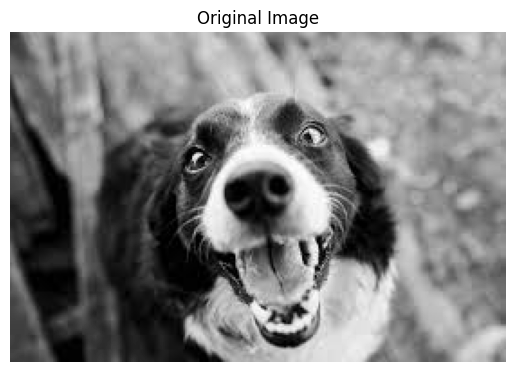

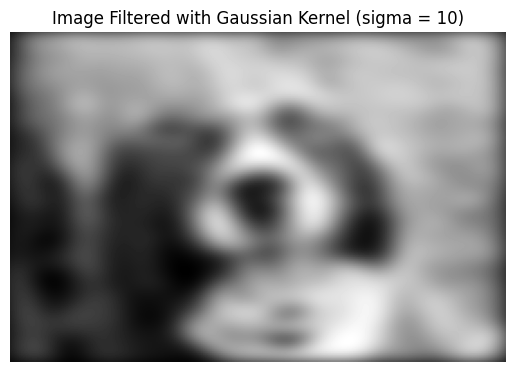

In [25]:
def next_power_of_two(n):
    return 1 << (n - 1).bit_length()

def pad_to_power_of_two(x):
    N = next_power_of_two(len(x))
    return x + [0] * (N - len(x))

# 1D FFT algorithm. The Cooley-Tukey algorithm recursively breaks down a DFT of size N into two DFTs of size N/2. If no power of two
# we pad the image to the nearest power of two.
def fft_1d(x):

    N = len(x)
    N_power_of_two = next_power_of_two(N)
    if N != N_power_of_two:
        x = pad_to_power_of_two(x)
        N = N_power_of_two

    if N <= 1:
        return x

    even = fft_1d(x[0::2])
    odd = fft_1d(x[1::2])
    T = [cmath.exp(-2j * math.pi * k / N) * odd[k % (N//2)] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

def fft_2d(source_image):
    # FFT on rows
    fft_rows = [fft_1d(row) for row in source_image]
    # Transpose the matrix
    fft_rows_transposed = list(map(list, zip(*fft_rows)))
    # FFT on columns (which are now the rows after transposition)
    fft_cols = [fft_1d(col) for col in fft_rows_transposed]
    # Transpose back to get the final result
    return [list(i) for i in zip(*fft_cols)]

def ifft_1d(X):
    N = len(X)
    # Conjugate the complex numbers
    X_conj = [x.conjugate() for x in X]
    # Forward FFT
    x = fft_1d(X_conj)
    # Conjugate the complex numbers again
    x = [xi.conjugate() / N for xi in x]
    return x

def ifft_2d(source_image):
    # IFFT on rows
    ifft_rows = [ifft_1d(row) for row in source_image]
    # Transpose the matrix
    ifft_rows_transposed = list(map(list, zip(*ifft_rows)))
    # IFFT on columns (which are now the rows after transposition)
    ifft_cols = [ifft_1d(col) for col in ifft_rows_transposed]
    # Transpose back to get the final result
    return [list(i) for i in zip(*ifft_cols)]

def create_gaussian_filter(height, width, sigma):
    center_x = height // 2
    center_y = width // 2
    gaussian_filter = [[0.0 for _ in range(width)] for _ in range(height)]
    for x in range(height):
        for y in range(width):
            distance_sq = (x - center_x) ** 2 + (y - center_y) ** 2
            gaussian_filter[x][y] = math.exp(-distance_sq / (2 * sigma ** 2))
    return gaussian_filter

def frequency_2d_filtering(source_image):

    height = len(source_image)
    width = len(source_image[0])

    centered_image = [[source_image[x][y] * (-1) ** (x + y) for y in range(width)] for x in range(height)]

    fft_output = fft_2d(centered_image)

    sigma = 10
    gaussian_filter = create_gaussian_filter(len(fft_output), len(fft_output[0]), sigma)

    filtered_in_frequency = [[fft_output[x][y] * gaussian_filter[x][y] for y in range(len(fft_output[0]))] for x in range(len(fft_output))]

    ifft_output = ifft_2d(filtered_in_frequency)

    recentered_image = [[ifft_output[x][y].real * (-1) ** (x + y) for y in range(width)] for x in range(height)] # remove padding if any

    recentered_image = [row[:width] for row in recentered_image[:height]]

    return recentered_image

src_img = cv2.imread('/content/gdrive/MyDrive/images/convolution_freq_domain.jpg', cv2.IMREAD_GRAYSCALE)
print(f"Height: {src_img.shape[0]}")
print(f"Width: {src_img.shape[1]}")
plt.axis('off')
plt.imshow(src_img, cmap='gray')
plt.title('Original Image')
plt.show()
filtered_image = frequency_2d_filtering(src_img)
plt.axis('off')
plt.imshow(filtered_image, cmap='gray')
plt.title('Image Filtered with Gaussian Kernel (sigma = 10)')
plt.show()